In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
x,y = make_regression(n_samples = 100, n_features = 1, n_informative=1,n_targets = 1 ,noise = 20 ,random_state=13)

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

[28.67684216]
-2.088699766134101


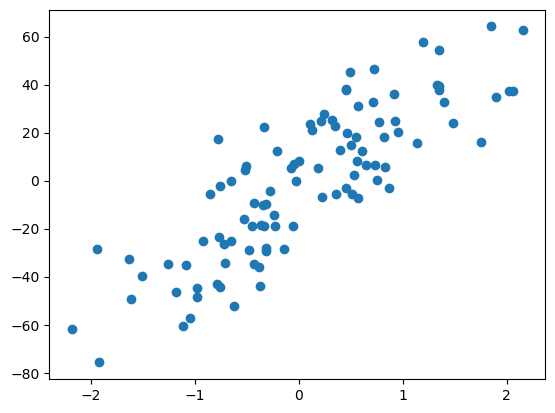

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)
plt.scatter(x,y)


C:\Users\user\AppData\Local\Temp\ipykernel_27052\3831172004.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  l.fit(x_train,y_train)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+04, tolerance: 7.705e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


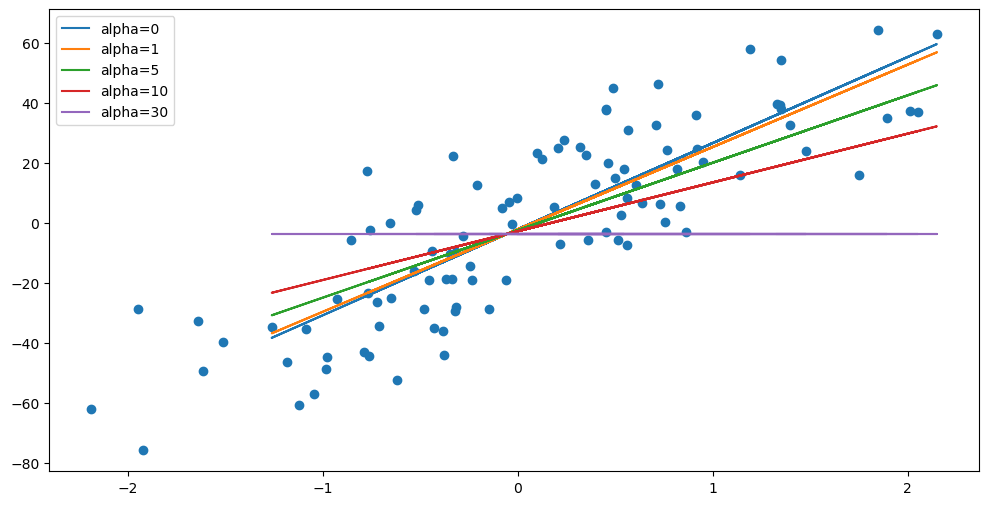

In [10]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(x,y)
for i in alphas:
    l = Lasso(alpha =i)
    l.fit(x_train,y_train)
    plt.plot(x_test,l.predict(x_test),label = 'alpha={}'.format(i))
plt.legend()
plt.show()

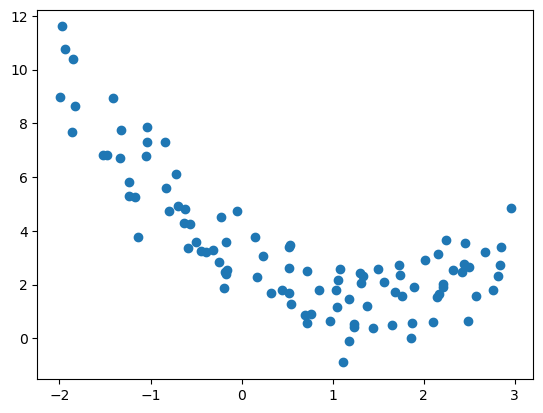

In [11]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.892e+01, tolerance: 6.395e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.ene

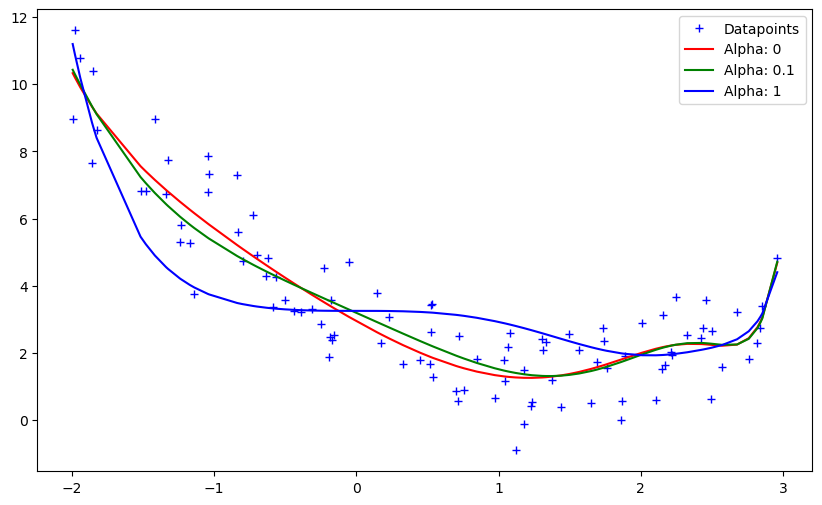

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

# Elastic net regression

In [19]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression ,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [21]:
x,y = load_diabetes(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
#Linear Regression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [23]:
# Ridge
reg = Ridge(alpha=0.1)
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
r2_score(y_test,y_pred)

0.45199494197195456

In [26]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
r2_score(y_test,y_pred)

0.441118559631106

In [37]:
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio = 0.9)
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
r2_score(y_test,y_pred)

0.4531474541554822